# COVID-19 and Libraries
## Group 5

# Did COVID have an affect on library circulation and visitors?

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy import stats

# Data files
library_covid_data = "../Data/Merged_Library_Covid_outer.csv"

# Read the mouse data and the study results
chi_library_covid = pd.read_csv(library_covid_data, dtype={'JANUARY': float, 'YTD': float, 'YEAR': object, 'ZIP': object})

# Display the data table for preview
chi_library_covid

,Unnamed: 0,ADDRESS,CITY,ZIP,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,...,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,YTD,TYPE,YEAR,LAT,LNG
0,0,3401 W. Foster Ave.,Chicago,60625,8214.0,7614.0,8460.0,7414.0,7044.0,7970.0,...,9069.0,7053.0,8012.0,6571.0,5924.0,93009.0,Circulation,2019,41.971155,-87.701816
1,1,13281 S. Corliss Ave.,Chicago,60827,378.0,326.0,332.0,270.0,320.0,325.0,...,229.0,234.0,377.0,369.0,500.0,4014.0,Circulation,2019,41.650765,-87.633087
2,2,5055 S. Archer Ave.,Chicago,60632,5365.0,5019.0,5417.0,5349.0,4833.0,4627.0,...,4793.0,4537.0,5263.0,4051.0,3415.0,58025.0,Circulation,2019,41.810038,-87.711251
3,3,5615 W. Race Ave.,Chicago,60644,215.0,590.0,706.0,736.0,806.0,983.0,...,1236.0,1193.0,1361.0,1286.0,1082.0,11328.0,Circulation,2019,41.881113,-87.756863
4,4,6100 W. Irving Park Rd.,Chicago,60634,9678.0,9764.0,10845.0,10541.0,9763.0,11442.0,...,11063.0,9379.0,9932.0,8567.0,6492.0,119100.0,Circulation,2019,41.944967,-87.797373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,1018,NaN,NaN,60660,NaN,NaN,245.0,779.0,1646.0,2962.0,...,4037.0,3626.0,4880.0,8846.0,5511.0,35552.0,Tests,2020,41.991062,-87.666362
834,1019,NaN,NaN,60661,NaN,NaN,67.0,111.0,303.0,473.0,...,1119.0,1030.0,1595.0,2620.0,1938.0,10100.0,Tests,2020,41.882786,-87.644283
835,1020,NaN,NaN,60666,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Tests,2020,41.979511,-87.896371
836,1021,NaN,NaN,60707,NaN,NaN,117.0,601.0,1278.0,901.0,...,205.0,0.0,0.0,0.0,0.0,4389.0,Tests,2020,41.921777,-87.808283


In [2]:
chi_library_covid.dtypes

Unnamed: 0      int64
ADDRESS        object
CITY           object
ZIP            object
JANUARY       float64
FEBRUARY      float64
MARCH         float64
APRIL         float64
MAY           float64
JUNE          float64
JULY          float64
AUGUST        float64
SEPTEMBER     float64
OCTOBER       float64
NOVEMBER      float64
DECEMBER      float64
YTD           float64
TYPE           object
YEAR           object
LAT           float64
LNG           float64
dtype: object

In [3]:
chi_library_covid_2019 = chi_library_covid.loc[chi_library_covid['YEAR'] == "2019"]
chi_library_covid_2020 = chi_library_covid.loc[chi_library_covid['YEAR'] == "2020"]
chi_library_covid_2021 = chi_library_covid.loc[chi_library_covid['YEAR'] == "2021"]

In [4]:
chi_library_covid_2019.head()

,Unnamed: 0,ADDRESS,CITY,ZIP,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,...,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,YTD,TYPE,YEAR,LAT,LNG
0,0,3401 W. Foster Ave.,Chicago,60625,8214.0,7614.0,8460.0,7414.0,7044.0,7970.0,...,9069.0,7053.0,8012.0,6571.0,5924.0,93009.0,Circulation,2019,41.971155,-87.701816
1,1,13281 S. Corliss Ave.,Chicago,60827,378.0,326.0,332.0,270.0,320.0,325.0,...,229.0,234.0,377.0,369.0,500.0,4014.0,Circulation,2019,41.650765,-87.633087
2,2,5055 S. Archer Ave.,Chicago,60632,5365.0,5019.0,5417.0,5349.0,4833.0,4627.0,...,4793.0,4537.0,5263.0,4051.0,3415.0,58025.0,Circulation,2019,41.810038,-87.711251
3,3,5615 W. Race Ave.,Chicago,60644,215.0,590.0,706.0,736.0,806.0,983.0,...,1236.0,1193.0,1361.0,1286.0,1082.0,11328.0,Circulation,2019,41.881113,-87.756863
4,4,6100 W. Irving Park Rd.,Chicago,60634,9678.0,9764.0,10845.0,10541.0,9763.0,11442.0,...,11063.0,9379.0,9932.0,8567.0,6492.0,119100.0,Circulation,2019,41.944967,-87.797373


### 2019 Summary Data starting with YTD then by month

In [5]:
# https://jamesrledoux.com/code/group-by-aggregate-pandas
summary_stats_2019_ytd = chi_library_covid_2019.groupby(['TYPE']).agg({'YTD': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_ytd.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_ytd = summary_stats_2019_ytd.reset_index()
summary_stats_2019_ytd

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,59075.41,39280.0,6.292804e+09,79327.20,8814.13
1,Visitors,100494.75,74724.5,2.491201e+10,157835.39,17646.53


In [6]:
summary_stats_2019_january = chi_library_covid_2019.groupby(['TYPE']).agg({'JANUARY': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_january.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_january = summary_stats_2019_january.reset_index()
summary_stats_2019_january

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,4712.41,2715.0,4.354170e+07,6598.61,733.18
1,Visitors,7303.70,5235.5,1.329275e+08,11529.42,1289.03


In [7]:
summary_stats_2019_february = chi_library_covid_2019.groupby(['TYPE']).agg({'FEBRUARY': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_february.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_february = summary_stats_2019_february.reset_index()
summary_stats_2019_february

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,4597.10,3106.0,3.932579e+07,6271.03,696.78
1,Visitors,8313.98,6647.0,1.346551e+08,11604.10,1297.38


In [8]:
summary_stats_2019_march = chi_library_covid_2019.groupby(['TYPE']).agg({'MARCH': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_march.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_march = summary_stats_2019_march.reset_index()
summary_stats_2019_march

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,5265.59,3354.0,5.182291e+07,7198.81,799.87
1,Visitors,8989.49,7207.5,1.882815e+08,13721.57,1534.12


In [9]:
summary_stats_2019_april = chi_library_covid_2019.groupby(['TYPE']).agg({'APRIL': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_april.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_april = summary_stats_2019_april.reset_index()
summary_stats_2019_april

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,4959.98,3152.0,4.528424e+07,6729.36,747.71
1,Visitors,8927.94,6599.0,2.150302e+08,14663.91,1639.47


In [10]:
summary_stats_2019_may = chi_library_covid_2019.groupby(['TYPE']).agg({'MAY': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_may.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_may = summary_stats_2019_may.reset_index()
summary_stats_2019_may

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,4728.74,2942.0,4.255893e+07,6523.72,724.86
1,Visitors,8278.91,6332.0,1.728198e+08,13146.09,1469.78


In [11]:
summary_stats_2019_june = chi_library_covid_2019.groupby(['TYPE']).agg({'JUNE': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_june.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_june = summary_stats_2019_june.reset_index()
summary_stats_2019_june

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,5054.40,3189.0,4.544742e+07,6741.47,749.05
1,Visitors,8341.39,6130.5,1.732121e+08,13161.01,1471.45


In [12]:
summary_stats_2019_july = chi_library_covid_2019.groupby(['TYPE']).agg({'JULY': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_july.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_july = summary_stats_2019_july.reset_index()
summary_stats_2019_july

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,5666.57,3633.0,5.295117e+07,7276.76,808.53
1,Visitors,9481.44,7269.0,1.834926e+08,13545.94,1514.48


In [13]:
summary_stats_2019_august = chi_library_covid_2019.groupby(['TYPE']).agg({'AUGUST': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_august.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_august = summary_stats_2019_august.reset_index()
summary_stats_2019_august

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,5537.20,3547.0,5.285459e+07,7270.12,807.79
1,Visitors,9128.36,7013.0,1.739529e+08,13189.12,1474.59


In [14]:
summary_stats_2019_september = chi_library_covid_2019.groupby(['TYPE']).agg({'SEPTEMBER': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_september.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_september = summary_stats_2019_september.reset_index()
summary_stats_2019_september

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,4789.09,3385.0,4.216470e+07,6493.44,721.49
1,Visitors,7963.30,5952.5,1.480688e+08,12168.35,1360.46


In [15]:
summary_stats_2019_october = chi_library_covid_2019.groupby(['TYPE']).agg({'OCTOBER': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_october.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_october = summary_stats_2019_october.reset_index()
summary_stats_2019_october

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,5137.59,3790.0,4.764671e+07,6902.66,766.96
1,Visitors,8893.72,6926.5,2.101539e+08,14496.69,1620.78


In [16]:
summary_stats_2019_november = chi_library_covid_2019.groupby(['TYPE']).agg({'NOVEMBER': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_november.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_november = summary_stats_2019_november.reset_index()
summary_stats_2019_november

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,4545.59,3223.0,3.802354e+07,6166.32,685.15
1,Visitors,7486.34,5902.5,1.390711e+08,11792.84,1318.48


In [17]:
summary_stats_2019_december = chi_library_covid_2019.groupby(['TYPE']).agg({'DECEMBER': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2019_december.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2019_december = summary_stats_2019_december.reset_index()
summary_stats_2019_december

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Circulation,4081.16,2654.0,3.276230e+07,5723.84,635.98
1,Visitors,7386.19,4826.0,2.491704e+08,15785.13,1764.83


### 2020 Summary Data starting with YTD then by month

In [18]:
summary_stats_2020 = chi_library_covid_2020.groupby(['TYPE']).agg({'YTD': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2020.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2020 = summary_stats_2020.reset_index()
summary_stats_2020

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,3554.47,2733.0,8.556272e+06,2925.11,380.82
1,Circulation,33656.25,19047.0,1.895243e+09,43534.39,4837.15
2,Deaths,74.64,70.0,3.274720e+03,57.23,7.45
3,Tests,40332.31,41243.0,5.806489e+08,24096.66,3137.12
4,Visitors,41459.75,30545.0,4.020040e+09,63403.79,7088.76


In [19]:
summary_stats_2020_january = chi_library_covid_2020.groupby(['TYPE']).agg({'JANUARY': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2020_january.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2020_january = summary_stats_2020_january.reset_index()
summary_stats_2020_january

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,NaN,NaN,NaN,NaN,NaN
1,Circulation,4766.65,2929.0,4.384517e+07,6621.57,735.73
2,Deaths,NaN,NaN,NaN,NaN,NaN
3,Tests,NaN,NaN,NaN,NaN,NaN
4,Visitors,7510.58,5285.0,1.427145e+08,11946.32,1335.64


In [20]:
summary_stats_2020_february = chi_library_covid_2020.groupby(['TYPE']).agg({'FEBRUARY': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2020_february.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2020_february = summary_stats_2020_february.reset_index()
summary_stats_2020_february

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,NaN,NaN,NaN,NaN,NaN
1,Circulation,4438.41,2838.0,3.493289e+07,5910.40,656.71
2,Deaths,NaN,NaN,NaN,NaN,NaN
3,Tests,NaN,NaN,NaN,NaN,NaN
4,Visitors,7354.44,5043.0,1.342300e+08,11585.77,1295.33


In [21]:
summary_stats_2020_march = chi_library_covid_2020.groupby(['TYPE']).agg({'MARCH': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2020_march.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2020_march = summary_stats_2020_march.reset_index()
summary_stats_2020_march

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,101.88,97.0,4569.35,67.60,8.80
1,Circulation,3147.78,1835.0,18132479.65,4258.22,473.14
2,Deaths,2.83,2.0,10.94,3.31,0.43
3,Tests,350.93,365.0,33518.93,183.08,23.84
4,Visitors,5203.10,3540.5,73739431.71,8587.17,960.07


In [22]:
summary_stats_2020_april = chi_library_covid_2020.groupby(['TYPE']).agg({'APRIL': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2020_april.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2020_april = summary_stats_2020_april.reset_index()
summary_stats_2020_april

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,368.64,282.0,134514.13,366.76,47.75
1,Circulation,3.68,0.0,936.20,30.60,3.40
2,Deaths,17.58,17.0,232.97,15.26,1.99
3,Tests,1226.93,1045.0,686487.89,828.55,107.87
4,Visitors,0.00,0.0,0.00,0.00,0.00


In [23]:
summary_stats_2020_may = chi_library_covid_2020.groupby(['TYPE']).agg({'MAY': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2020_may.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2020_may = summary_stats_2020_may.reset_index()
summary_stats_2020_may

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,355.93,232.0,172080.93,414.83,54.01
1,Circulation,4.16,0.0,753.89,27.46,3.05
2,Deaths,19.68,16.0,319.98,17.89,2.33
3,Tests,2628.83,2427.0,3307407.76,1818.63,236.77
4,Visitors,0.00,0.0,0.00,0.00,0.00


In [24]:
summary_stats_2020_june = chi_library_covid_2020.groupby(['TYPE']).agg({'JUNE': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2020_june.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2020_june = summary_stats_2020_june.reset_index()
summary_stats_2020_june

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,92.78,72.0,5738.69,75.75,9.86
1,Circulation,2127.46,1109.0,8017294.18,2831.48,314.61
2,Deaths,5.63,4.0,32.79,5.73,0.75
3,Tests,2658.19,2679.0,2606176.88,1614.37,210.17
4,Visitors,2208.50,1702.0,8688540.81,2947.63,329.56


In [25]:
summary_stats_2020_july = chi_library_covid_2020.groupby(['TYPE']).agg({'JULY': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2020_july.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2020_july = summary_stats_2020_july.reset_index()
summary_stats_2020_july

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,129.76,104.0,9023.46,94.99,12.37
1,Circulation,3285.53,1686.0,17201649.98,4147.49,460.83
2,Deaths,1.83,1.0,4.76,2.18,0.28
3,Tests,3383.34,3164.0,4381179.43,2093.13,272.50
4,Visitors,3238.62,2494.5,19582869.05,4425.25,494.76


In [26]:
summary_stats_2020_august = chi_library_covid_2020.groupby(['TYPE']).agg({'AUGUST': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2020_august.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2020_august = summary_stats_2020_august.reset_index()
summary_stats_2020_august

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,198.10,147.0,29433.44,171.56,22.34
1,Circulation,3240.78,1656.0,17004080.62,4123.60,458.18
2,Deaths,1.80,1.0,4.79,2.19,0.28
3,Tests,4490.92,4037.0,7973314.80,2823.71,367.62
4,Visitors,3356.32,2552.5,18754938.07,4330.70,484.19


In [27]:
summary_stats_2020_september = chi_library_covid_2020.groupby(['TYPE']).agg({'SEPTEMBER': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2020_september.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2020_september = summary_stats_2020_september.reset_index()
summary_stats_2020_september

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,147.31,105.0,15687.49,125.25,16.31
1,Circulation,3306.25,1866.0,17454541.89,4177.86,464.21
2,Deaths,1.41,1.0,3.14,1.77,0.23
3,Tests,3750.49,3732.0,5519725.91,2349.41,305.87
4,Visitors,3439.84,2657.5,27410027.78,5235.46,585.34


In [28]:
summary_stats_2020_october = chi_library_covid_2020.groupby(['TYPE']).agg({'OCTOBER': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2020_october.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2020_october = summary_stats_2020_october.reset_index()
summary_stats_2020_october

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,439.76,329.0,128994.53,359.16,46.76
1,Circulation,3385.48,1914.0,18675826.80,4321.55,480.17
2,Deaths,2.14,1.0,5.64,2.37,0.31
3,Tests,5746.98,5635.0,14299958.19,3781.53,492.31
4,Visitors,3584.99,2727.0,36255809.66,6021.28,673.20


In [29]:
summary_stats_2020_november = chi_library_covid_2020.groupby(['TYPE']).agg({'NOVEMBER': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2020_november.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2020_november = summary_stats_2020_november.reset_index()
summary_stats_2020_november

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,1153.90,922.0,855054.40,924.69,120.38
1,Circulation,3030.10,1578.0,16465002.27,4057.71,450.86
2,Deaths,10.68,9.0,87.02,9.33,1.21
3,Tests,9624.68,9279.0,35413923.43,5950.96,774.75
4,Visitors,2823.26,2049.5,21525398.68,4639.55,518.72


In [30]:
summary_stats_2020_december = chi_library_covid_2020.groupby(['TYPE']).agg({'DECEMBER': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2020_december.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2020_december = summary_stats_2020_december.reset_index()
summary_stats_2020_december

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,566.41,455.0,202847.76,450.39,58.64
1,Circulation,2919.98,1609.0,14919581.00,3862.59,429.18
2,Deaths,11.08,10.0,86.08,9.28,1.21
3,Tests,6471.02,6241.0,15996242.53,3999.53,520.69
4,Visitors,2740.10,1769.5,23151498.07,4811.60,537.95


### 2021 Summary Data starting with YTD then by month

In [31]:
summary_stats_2021 = chi_library_covid_2021.groupby(['TYPE']).agg({'YTD': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2021.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2021 = summary_stats_2021.reset_index()
summary_stats_2021

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,4109.75,3985.0,5.168228e+06,2273.37,295.97
1,Circulation,39312.68,23328.0,2.366440e+09,48646.07,5405.12
2,Deaths,37.25,36.0,8.009200e+02,28.30,3.68
3,Tests,97326.32,101412.0,2.897011e+09,53823.89,7007.27
4,Visitors,44132.74,33031.0,3.988815e+09,63157.07,7017.45


In [32]:
summary_stats_2021_january = chi_library_covid_2021.groupby(['TYPE']).agg({'JANUARY': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2021_january.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2021_january = summary_stats_2021_january.reset_index()
summary_stats_2021_january

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,476.19,418.0,111015.50,333.19,43.38
1,Circulation,2986.72,1491.0,16280799.03,4034.95,448.33
2,Deaths,7.90,8.0,37.75,6.14,0.80
3,Tests,7969.14,7979.0,24189020.46,4918.23,640.30
4,Visitors,2853.53,2007.0,21493242.43,4636.08,515.12


In [33]:
summary_stats_2021_february = chi_library_covid_2021.groupby(['TYPE']).agg({'FEBRUARY': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2021_february.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2021_february = summary_stats_2021_february.reset_index()
summary_stats_2021_february

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,138.29,123.0,8420.62,91.76,11.95
1,Circulation,2697.90,1265.0,13424649.42,3663.97,407.11
2,Deaths,3.54,3.0,11.08,3.33,0.43
3,Tests,5306.25,5061.0,12252197.16,3500.31,455.70
4,Visitors,2660.83,1971.0,18102033.59,4254.65,472.74


In [34]:
summary_stats_2021_march = chi_library_covid_2021.groupby(['TYPE']).agg({'MARCH': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2021_march.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2021_march = summary_stats_2021_march.reset_index()
summary_stats_2021_march

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,218.00,199.0,19141.34,138.35,18.01
1,Circulation,3351.57,1704.0,18302237.20,4278.11,475.35
2,Deaths,2.17,2.0,4.11,2.03,0.26
3,Tests,5836.27,5843.0,13205250.79,3633.90,473.09
4,Visitors,3408.48,2367.0,26930765.50,5189.49,576.61


In [35]:
summary_stats_2021_april = chi_library_covid_2021.groupby(['TYPE']).agg({'APRIL': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2021_april.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2021_april = summary_stats_2021_april.reset_index()
summary_stats_2021_april

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,283.56,279.0,28444.25,168.65,21.96
1,Circulation,3145.12,1517.0,16998461.73,4122.92,458.10
2,Deaths,2.97,2.0,8.52,2.92,0.38
3,Tests,6352.90,6788.0,14311829.89,3783.10,492.52
4,Visitors,3382.41,2486.0,21365038.59,4622.23,513.58


In [36]:
summary_stats_2021_may = chi_library_covid_2021.groupby(['TYPE']).agg({'MAY': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2021_may.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2021_may = summary_stats_2021_may.reset_index()
summary_stats_2021_may

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,134.90,122.0,9445.02,97.19,12.65
1,Circulation,3222.44,1579.0,17595626.68,4194.71,466.08
2,Deaths,3.86,3.0,12.95,3.60,0.47
3,Tests,6075.83,6303.0,11575559.04,3402.29,442.94
4,Visitors,3211.56,2490.0,11176212.65,3343.08,371.45


In [37]:
summary_stats_2021_june = chi_library_covid_2021.groupby(['TYPE']).agg({'JUNE': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2021_june.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2021_june = summary_stats_2021_june.reset_index()
summary_stats_2021_june

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,21.37,21.0,210.76,14.52,1.89
1,Circulation,3510.77,1681.0,20935426.93,4575.52,508.39
2,Deaths,1.17,1.0,2.21,1.49,0.19
3,Tests,3449.81,3815.0,3415961.57,1848.23,240.62
4,Visitors,3712.07,2675.0,32813475.69,5728.30,636.48


In [38]:
summary_stats_2021_july = chi_library_covid_2021.groupby(['TYPE']).agg({'JULY': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2021_july.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2021_july = summary_stats_2021_july.reset_index()
summary_stats_2021_july

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,79.03,76.0,2123.48,46.08,6.00
1,Circulation,3697.63,2070.0,20955865.74,4577.76,508.64
2,Deaths,0.68,0.0,0.81,0.90,0.12
3,Tests,4417.10,4217.0,7189717.54,2681.36,349.08
4,Visitors,4225.02,2944.0,37606836.27,6132.44,681.38


In [39]:
summary_stats_2021_august = chi_library_covid_2021.groupby(['TYPE']).agg({'AUGUST': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2021_august.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2021_august = summary_stats_2021_august.reset_index()
summary_stats_2021_august

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,282.49,255.0,26372.46,162.40,21.14
1,Circulation,3495.12,1634.0,19504800.31,4416.42,490.71
2,Deaths,2.17,1.0,6.45,2.54,0.33
3,Tests,8374.46,8419.0,21174465.15,4601.57,599.07
4,Visitors,4064.98,3083.0,27604769.47,5254.02,583.78


In [40]:
summary_stats_2021_september = chi_library_covid_2021.groupby(['TYPE']).agg({'SEPTEMBER': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2021_september.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2021_september = summary_stats_2021_september.reset_index()
summary_stats_2021_september

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,190.92,179.0,11435.67,106.94,13.92
1,Circulation,3385.86,1818.0,18336060.19,4282.06,475.78
2,Deaths,2.37,2.0,5.55,2.36,0.31
3,Tests,8575.61,9009.0,24416476.55,4941.30,643.30
4,Visitors,4150.81,2969.0,37572696.00,6129.66,681.07


In [41]:
summary_stats_2021_october = chi_library_covid_2021.groupby(['TYPE']).agg({'OCTOBER': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2021_october.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2021_october = summary_stats_2021_october.reset_index()
summary_stats_2021_october

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,198.34,180.0,12378.64,111.26,14.48
1,Circulation,3450.54,1895.0,18607296.15,4313.62,479.29
2,Deaths,2.22,2.0,6.31,2.51,0.33
3,Tests,12375.34,13156.0,53012019.68,7280.94,947.90
4,Visitors,4395.72,3095.0,43264411.68,6577.57,730.84


In [42]:
summary_stats_2021_november = chi_library_covid_2021.groupby(['TYPE']).agg({'NOVEMBER': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2021_november.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2021_november = summary_stats_2021_november.reset_index()
summary_stats_2021_november

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,315.14,293.0,32999.71,181.66,23.65
1,Circulation,3353.89,1830.0,17823673.65,4221.81,469.09
2,Deaths,2.27,1.0,7.48,2.73,0.36
3,Tests,11504.97,12004.0,44184796.52,6647.16,865.39
4,Visitors,4130.49,3088.0,38105838.73,6172.99,685.89


In [43]:
summary_stats_2021_december = chi_library_covid_2021.groupby(['TYPE']).agg({'DECEMBER': ['mean', 'median', 'var', 'std', 'sem']}).round(2)
summary_stats_2021_december.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats_2021_december = summary_stats_2021_december.reset_index()
summary_stats_2021_december

,TYPE,Mean,Median,Variance,Standard Deviation,SEM
0,Cases,1771.53,1744.0,9.062075e+05,951.95,123.93
1,Circulation,3015.11,1603.0,1.487369e+07,3856.64,428.52
2,Deaths,5.93,5.0,3.075000e+01,5.55,0.72
3,Tests,17088.64,16238.0,1.071197e+08,10349.86,1347.44
4,Visitors,3936.84,2927.0,3.547494e+07,5956.08,661.79


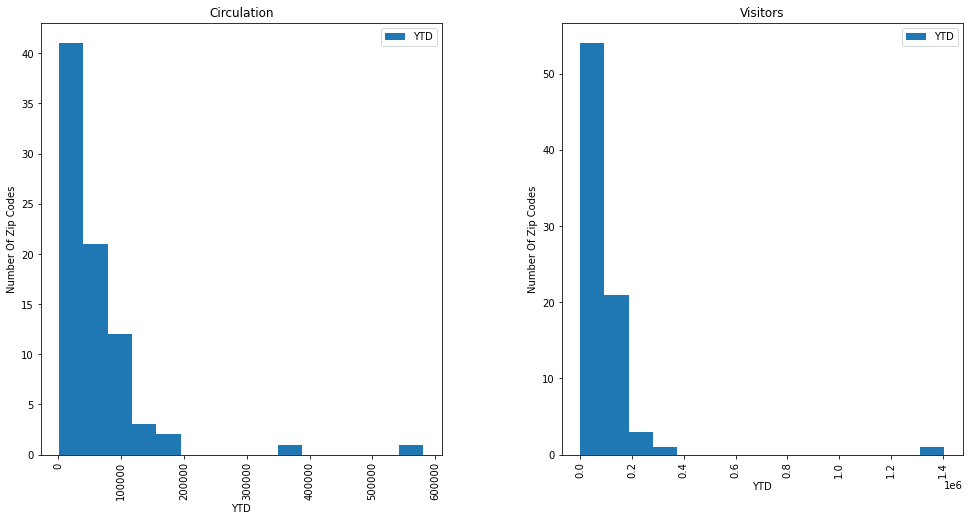

In [44]:
#  2019 Histograms - No Covid Data in 2019
histogram_2019 = chi_library_covid_2019.hist(column=('YTD'), by= 'TYPE', bins = 15, grid=False,
            figsize=(16, 8),
            legend=True)
for ax in histogram_2019.flatten():
    ax.set_xlabel("YTD")
    ax.set_ylabel("Number Of Zip Codes")

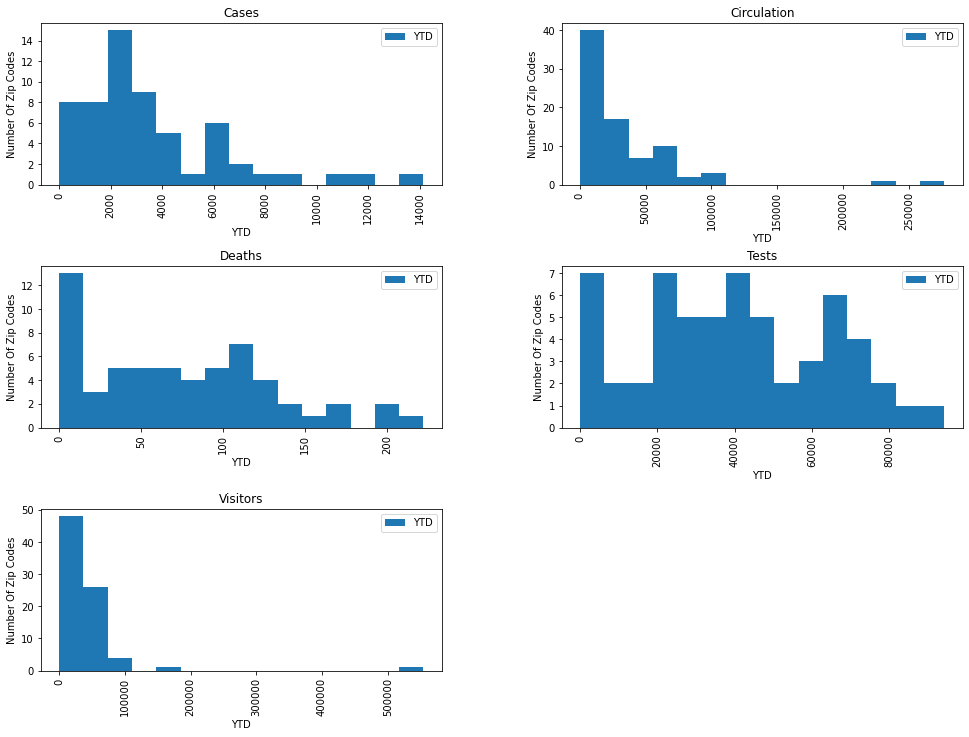

In [45]:
# 2020 Histograms
histogram_2020 = chi_library_covid_2020.hist(column=('YTD'), by= 'TYPE', bins = 15, grid=False,
        figsize=(16, 12),
        legend=True)
for ax in histogram_2020.flatten():
    ax.set_xlabel("YTD")
    ax.set_ylabel("Number Of Zip Codes")

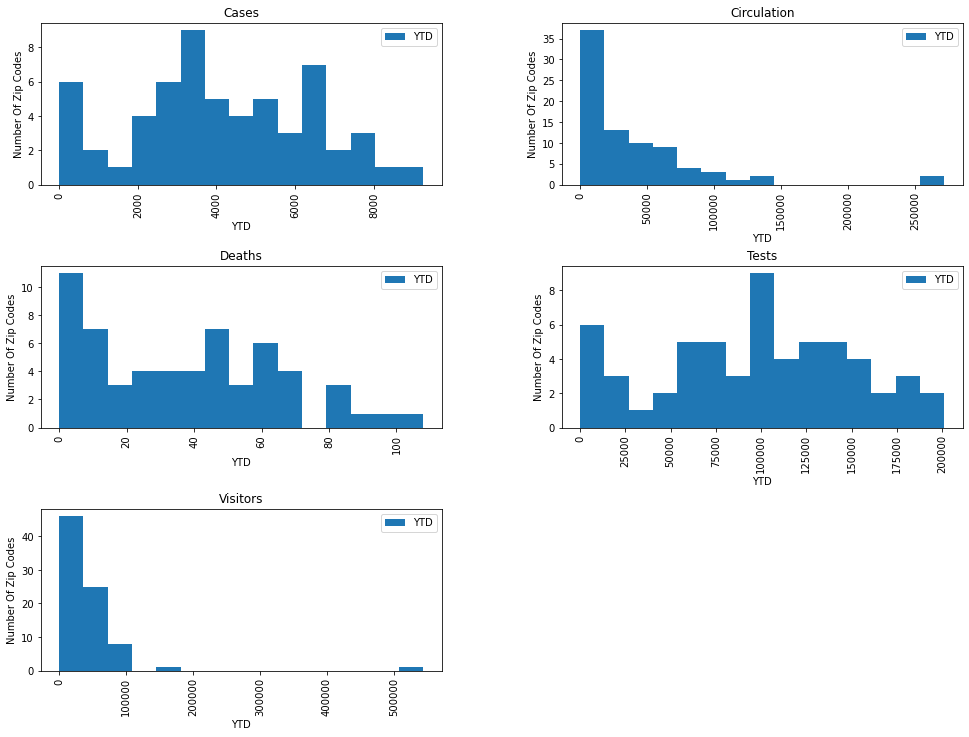

In [46]:
# 2021 Histograms
histogram_2021 = chi_library_covid_2021.hist(column=('YTD'), by= 'TYPE', bins = 15, grid=False,
        figsize=(16, 12),
        legend=True)
for ax in histogram_2021.flatten():
    ax.set_xlabel("YTD")
    ax.set_ylabel("Number Of Zip Codes")

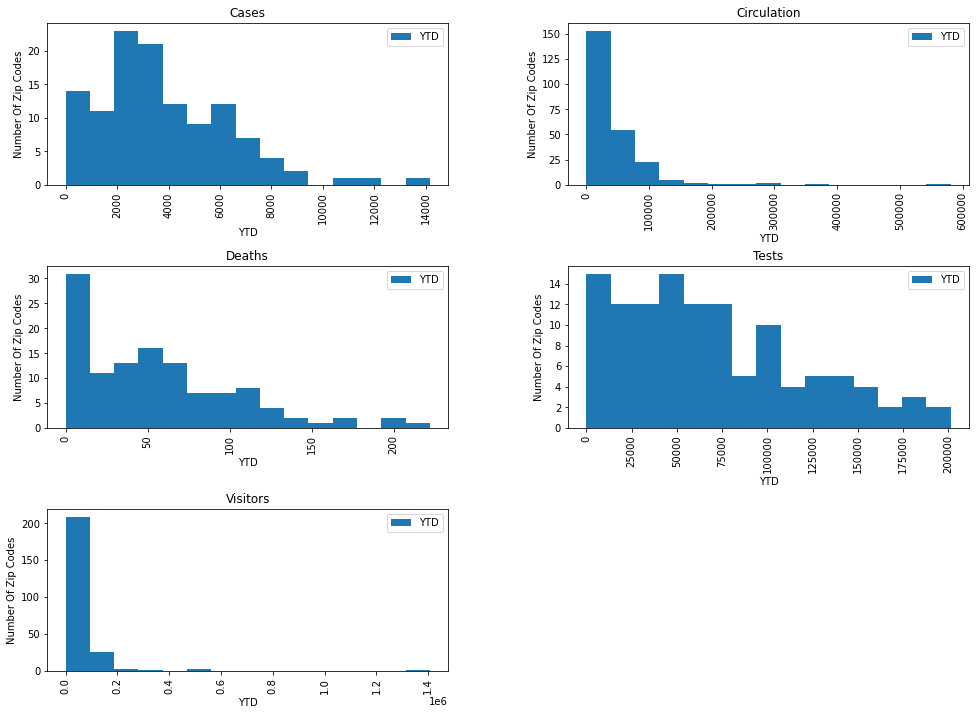

In [47]:
# All data histograms
histogram_all = chi_library_covid.hist(column=('YTD'), by= 'TYPE', bins = 15, grid=False,
        figsize=(16, 12),
        legend=True)
for ax in histogram_all.flatten():
    ax.set_xlabel("YTD")
    ax.set_ylabel("Number Of Zip Codes")

# Did COVID impact monthly library visitation and circulation trends?

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.stats as st
import numpy as np
import os

# Load data
library_path = "../Data/merged_library_covid_outer.csv"
df = pd.read_csv(library_path)
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,ADDRESS,CITY,ZIP,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,YTD,TYPE,YEAR,LAT,LNG
0,3401 W. Foster Ave.,Chicago,60625,8214.0,7614.0,8460.0,7414.0,7044.0,7970.0,9664.0,9069.0,7053.0,8012.0,6571.0,5924.0,93009.0,Circulation,2019,41.971155,-87.701816
1,13281 S. Corliss Ave.,Chicago,60827,378.0,326.0,332.0,270.0,320.0,325.0,354.0,229.0,234.0,377.0,369.0,500.0,4014.0,Circulation,2019,41.650765,-87.633087
2,5055 S. Archer Ave.,Chicago,60632,5365.0,5019.0,5417.0,5349.0,4833.0,4627.0,5356.0,4793.0,4537.0,5263.0,4051.0,3415.0,58025.0,Circulation,2019,41.810038,-87.711251
3,5615 W. Race Ave.,Chicago,60644,215.0,590.0,706.0,736.0,806.0,983.0,1134.0,1236.0,1193.0,1361.0,1286.0,1082.0,11328.0,Circulation,2019,41.881113,-87.756863
4,6100 W. Irving Park Rd.,Chicago,60634,9678.0,9764.0,10845.0,10541.0,9763.0,11442.0,11634.0,11063.0,9379.0,9932.0,8567.0,6492.0,119100.0,Circulation,2019,41.944967,-87.797373


In [49]:
array = ['Circulation', 'Cases']
circ_vs_cases_2019 = df.loc[(df['TYPE'].isin(array)) & (df['YEAR'] == 2019)]
circ_vs_cases_2019_df = pd.DataFrame(circ_vs_cases_2019)
circ_vs_cases_2019_df = circ_vs_cases_2019[['TYPE',"YEAR",'JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER']]
circ_vs_cases_2019_df = circ_vs_cases_2019_df.groupby(['TYPE','YEAR']).sum()
circ_vs_cases_2019_df


,,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER
TYPE,YEAR,,,,,,,,,,,,
Circulation,2019,381705.0,372365.0,426513.0,401758.0,383028.0,409406.0,458992.0,448513.0,387916.0,416145.0,368193.0,330574.0


In [50]:
array = ['Circulation', 'Cases']
circ_vs_cases_2020 = df.loc[(df['TYPE'].isin(array)) & (df['YEAR'] == 2020)]
circ_vs_cases_2020_df = pd.DataFrame(circ_vs_cases_2020)
circ_vs_cases_2020_df = circ_vs_cases_2020[['TYPE',"YEAR",'JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER']]
circ_vs_cases_2020_df = circ_vs_cases_2020_df.groupby(['TYPE','YEAR']).sum()
circ_vs_cases_2020_df

,,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER
TYPE,YEAR,,,,,,,,,,,,
Cases,2020,0.0,0.0,6011.0,21750.0,21000.0,5474.0,7656.0,11688.0,8691.0,25946.0,68080.0,33418.0
Circulation,2020,386099.0,359511.0,254970.0,298.0,337.0,172324.0,266128.0,262503.0,267806.0,274224.0,245438.0,236518.0


In [51]:
circ_vs_cases_2020_final_df = pd.merge(circ_vs_cases_2019_df, circ_vs_cases_2020_df, how = "outer", on = ['TYPE',"YEAR",'JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER'])
circ_vs_cases_2020_final_df = circ_vs_cases_2020_final_df.transpose()
circ_vs_cases_2020_final_df

TYPE,Circulation,Cases,Circulation
YEAR,2019,2020,2020
JANUARY,381705.0,0.0,386099.0
FEBRUARY,372365.0,0.0,359511.0
MARCH,426513.0,6011.0,254970.0
APRIL,401758.0,21750.0,298.0
MAY,383028.0,21000.0,337.0
JUNE,409406.0,5474.0,172324.0
JULY,458992.0,7656.0,266128.0
AUGUST,448513.0,11688.0,262503.0
SEPTEMBER,387916.0,8691.0,267806.0


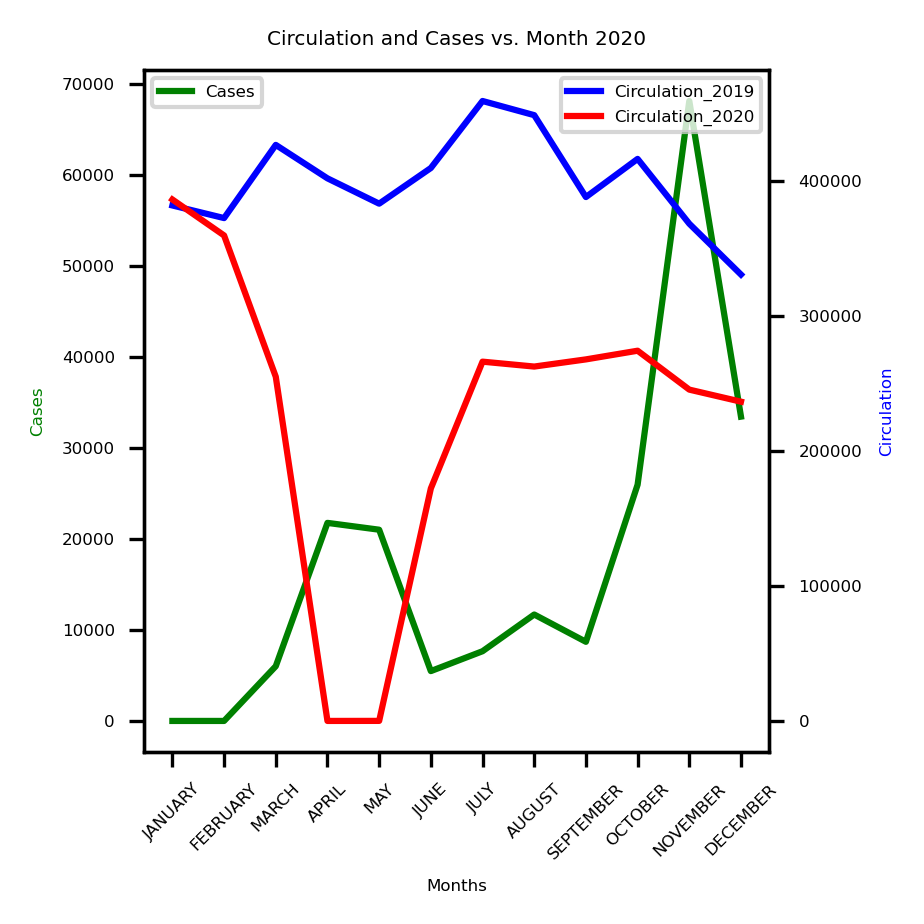

In [69]:
fig, ax1 = plt.subplots()
plt.rcParams.update({'figure.figsize':(4,4), 'figure.dpi':300, 'font.size':4})
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
ax2 = ax1.twinx()
ax1.plot(circ_vs_cases_2020_final_df['Cases'], color='g')
ax2.plot(circ_vs_cases_2020_final_df.iloc[:,0], color='b')
ax2.plot(circ_vs_cases_2020_final_df.iloc[:,2], color='r')
plt.title('Circulation and Cases vs. Month 2020')
ax1.set_xlabel('Months')ß
ax1.set_ylabel('Cases', color='g')
ax2.set_ylabel('Circulation', color='b')
fig.tight_layout()
ax2.legend(['Circulation_2019', 'Circulation_2020'])
ax1.legend(['Cases'])
plt.savefig('../Figures/Circulation and Cases vs. Month 2020.png')

In [53]:
array = ['Circulation', 'Cases']
circ_vs_cases_2021 = df.loc[(df['TYPE'].isin(array)) & (df['YEAR'] == 2021)]
circ_vs_cases_2021_df = pd.DataFrame(circ_vs_cases_2021)
circ_vs_cases_2021_df = circ_vs_cases_2021[['TYPE',"YEAR",'JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER']]
circ_vs_cases_2021_df = circ_vs_cases_2021_df.groupby(['TYPE','YEAR']).sum()
circ_vs_cases_2021_df = pd.DataFrame(circ_vs_cases_2021_df)
circ_vs_cases_2021_df 

,,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER
TYPE,YEAR,,,,,,,,,,,,
Cases,2021,28095.0,8159.0,12862.0,16730.0,7959.0,1261.0,4663.0,16667.0,11264.0,11702.0,18593.0,104520.0
Circulation,2021,241924.0,218530.0,271477.0,254755.0,261018.0,284372.0,299508.0,283105.0,274255.0,279494.0,271665.0,244224.0


In [54]:
circ_vs_cases_2021_final_df = pd.merge(circ_vs_cases_2019_df, circ_vs_cases_2021_df, how = "outer", on = ['TYPE',"YEAR",'JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER'])
circ_vs_cases_2021_final_df = circ_vs_cases_2021_final_df.transpose()
circ_vs_cases_2021_final_df

TYPE,Circulation,Cases,Circulation
YEAR,2019,2021,2021
JANUARY,381705.0,28095.0,241924.0
FEBRUARY,372365.0,8159.0,218530.0
MARCH,426513.0,12862.0,271477.0
APRIL,401758.0,16730.0,254755.0
MAY,383028.0,7959.0,261018.0
JUNE,409406.0,1261.0,284372.0
JULY,458992.0,4663.0,299508.0
AUGUST,448513.0,16667.0,283105.0
SEPTEMBER,387916.0,11264.0,274255.0


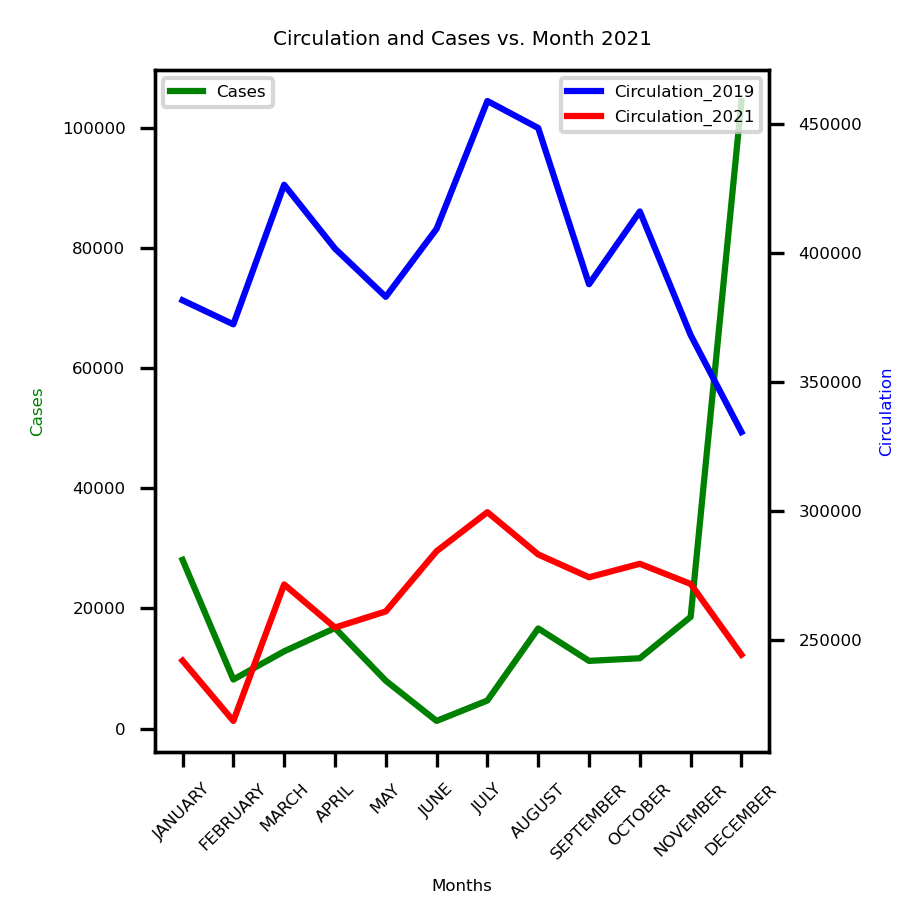

In [55]:
fig, ax1 = plt.subplots()
plt.rcParams.update({'figure.figsize':(3,3), 'figure.dpi':300, 'font.size':4})
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
ax2 = ax1.twinx()
ax1.plot(circ_vs_cases_2021_final_df['Cases'], color='g')
ax2.plot(circ_vs_cases_2021_final_df.iloc[:,0], color='b')
ax2.plot(circ_vs_cases_2021_final_df.iloc[:,2], color='r')
plt.title('Circulation and Cases vs. Month 2021')
ax1.set_xlabel('Months')
ax1.set_ylabel('Cases', color='g')
ax2.set_ylabel('Circulation', color='b')
fig.tight_layout()
ax2.legend(['Circulation_2019', 'Circulation_2021'])
ax1.legend(['Cases'])
plt.savefig('../Figures/Circulation and Cases vs. Month 2021.png')

In [56]:
array = ['Visitors', 'Cases']
vis_vs_cases_2019 = df.loc[(df['TYPE'].isin(array)) & (df['YEAR'] == 2019)]
vis_vs_cases_2019_df = pd.DataFrame(vis_vs_cases_2019)
vis_vs_cases_2019_df = vis_vs_cases_2019_df[['TYPE',"YEAR",'JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER']]
vis_vs_cases_2019_df = vis_vs_cases_2019_df.groupby(['TYPE','YEAR']).sum()
vis_vs_cases_2019_df = pd.DataFrame(vis_vs_cases_2019_df)
vis_vs_cases_2019_df

,,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER
TYPE,YEAR,,,,,,,,,,,,
Visitors,2019,584296.0,665118.0,719159.0,714235.0,662313.0,667311.0,758515.0,730269.0,637064.0,711498.0,598907.0,590895.0


In [57]:
array = ['Visitors', 'Cases']
vis_vs_cases_2020 = df.loc[(df['TYPE'].isin(array)) & (df['YEAR'] == 2020)]
vis_vs_cases_2020_df = pd.DataFrame(vis_vs_cases_2020)
vis_vs_cases_2020_df = vis_vs_cases_2020_df[['TYPE',"YEAR",'JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER']]
vis_vs_cases_2020_df = vis_vs_cases_2020_df.groupby(['TYPE','YEAR']).sum()
vis_vs_cases_2020_df = pd.DataFrame(vis_vs_cases_2020_df)
vis_vs_cases_2020_df

,,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER
TYPE,YEAR,,,,,,,,,,,,
Cases,2020,0.0,0.0,6011.0,21750.0,21000.0,5474.0,7656.0,11688.0,8691.0,25946.0,68080.0,33418.0
Visitors,2020,600846.0,588355.0,416248.0,0.0,0.0,176680.0,259090.0,268506.0,275187.0,286799.0,225861.0,219208.0


In [58]:
vis_vs_cases_2020_final_df = pd.merge(vis_vs_cases_2019_df, vis_vs_cases_2020_df, how = "outer", on = ['TYPE',"YEAR",'JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER'])
vis_vs_cases_2020_final_df = vis_vs_cases_2020_final_df.transpose()
vis_vs_cases_2020_final_df

TYPE,Visitors,Cases,Visitors
YEAR,2019,2020,2020
JANUARY,584296.0,0.0,600846.0
FEBRUARY,665118.0,0.0,588355.0
MARCH,719159.0,6011.0,416248.0
APRIL,714235.0,21750.0,0.0
MAY,662313.0,21000.0,0.0
JUNE,667311.0,5474.0,176680.0
JULY,758515.0,7656.0,259090.0
AUGUST,730269.0,11688.0,268506.0
SEPTEMBER,637064.0,8691.0,275187.0


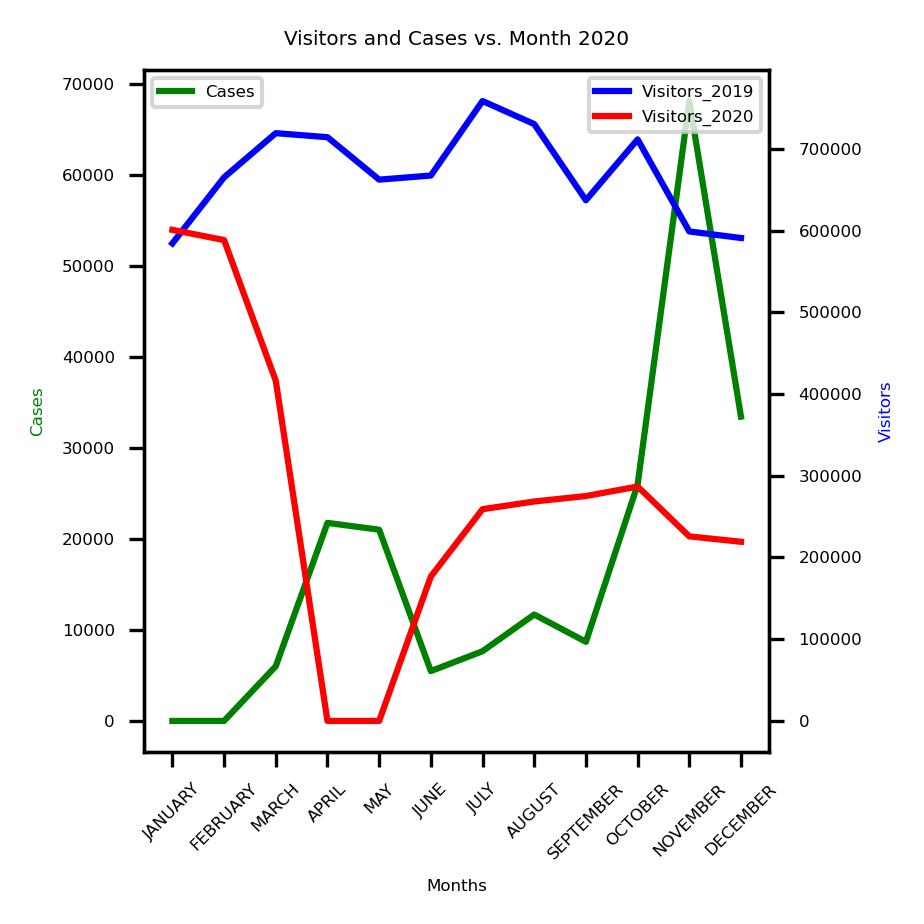

In [59]:
fig, ax1 = plt.subplots()
plt.rcParams.update({'figure.figsize':(3,3), 'figure.dpi':300, 'font.size':4})
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
ax2 = ax1.twinx()
ax1.plot(vis_vs_cases_2020_final_df['Cases'], color='g')
ax2.plot(vis_vs_cases_2020_final_df.iloc[:,0], color='b')
ax2.plot(vis_vs_cases_2020_final_df.iloc[:,2], color='r')
plt.title('Visitors and Cases vs. Month 2020')
ax1.set_xlabel('Months')
ax1.set_ylabel('Cases', color='g')
ax2.set_ylabel('Visitors', color='b')
fig.tight_layout()
ax2.legend(['Visitors_2019', 'Visitors_2020'])
ax1.legend(['Cases'])
plt.savefig('../Figures/Visitors and Cases vs. Month 2020.png')

In [60]:
array = ['Visitors', 'Cases']
vis_vs_cases_2021 = df.loc[(df['TYPE'].isin(array)) & (df['YEAR'] == 2021)]
vis_vs_cases_2021_df = pd.DataFrame(vis_vs_cases_2021)
vis_vs_cases_2021_df = vis_vs_cases_2021_df[['TYPE',"YEAR",'JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER']]
vis_vs_cases_2021_df = vis_vs_cases_2021_df.groupby(['TYPE','YEAR']).sum()
vis_vs_cases_2021_df = pd.DataFrame(vis_vs_cases_2021_df)
vis_vs_cases_2021_df

,,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER
TYPE,YEAR,,,,,,,,,,,,
Cases,2021,28095.0,8159.0,12862.0,16730.0,7959.0,1261.0,4663.0,16667.0,11264.0,11702.0,18593.0,104520.0
Visitors,2021,231136.0,215527.0,276087.0,273975.0,260136.0,300678.0,342227.0,329263.0,336216.0,356053.0,334570.0,318884.0


In [61]:
vis_vs_cases_2021_final_df = pd.merge(vis_vs_cases_2019_df, vis_vs_cases_2021_df, how = "outer", on = ['TYPE',"YEAR",'JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY','AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER'])
vis_vs_cases_2021_final_df = vis_vs_cases_2021_final_df.transpose()
vis_vs_cases_2021_final_df

TYPE,Visitors,Cases,Visitors
YEAR,2019,2021,2021
JANUARY,584296.0,28095.0,231136.0
FEBRUARY,665118.0,8159.0,215527.0
MARCH,719159.0,12862.0,276087.0
APRIL,714235.0,16730.0,273975.0
MAY,662313.0,7959.0,260136.0
JUNE,667311.0,1261.0,300678.0
JULY,758515.0,4663.0,342227.0
AUGUST,730269.0,16667.0,329263.0
SEPTEMBER,637064.0,11264.0,336216.0


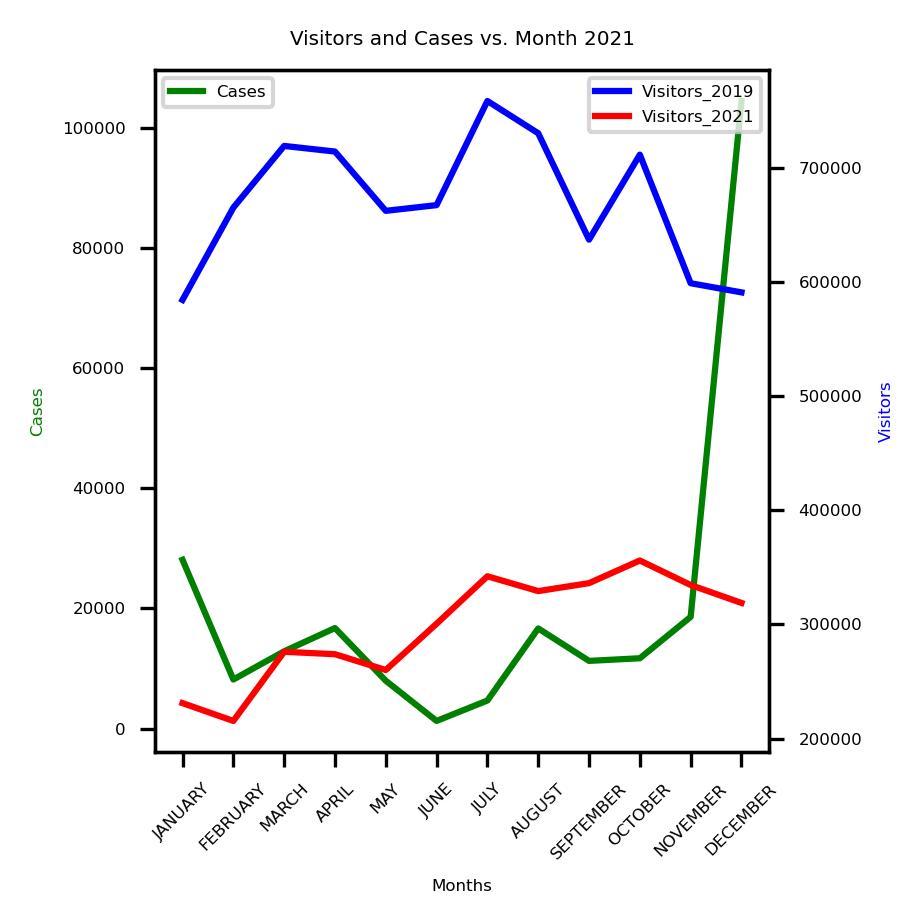

In [62]:
fig, ax1 = plt.subplots()
plt.rcParams.update({'figure.figsize':(3,3), 'figure.dpi':300, 'font.size':4})
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
ax2 = ax1.twinx()
ax1.plot(vis_vs_cases_2021_final_df['Cases'], color='g')
ax2.plot(vis_vs_cases_2021_final_df.iloc[:,0], color='b')
ax2.plot(vis_vs_cases_2021_final_df.iloc[:,2], color='r')
plt.title('Visitors and Cases vs. Month 2021')
ax1.set_xlabel('Months')
ax1.set_ylabel('Cases', color='g')
ax2.set_ylabel('Visitors', color='b')
fig.tight_layout()
ax2.legend(['Visitors_2019', 'Visitors_2021'])
ax1.legend(['Cases'])
plt.savefig('../Figures/Visitors and Cases vs. Month 2021.png')

# Is there a ZIP code dependent correlation between COVID deaths and library visitation?

In [71]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.lines import Line2D
import matplotlib
import scipy.stats as st
import numpy as np
import os

# Load data
library_path = "../Data/merged_library_covid_outer.csv"
df = pd.read_csv(library_path)
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,ADDRESS,CITY,ZIP,JANUARY,FEBRUARY,MARCH,APRIL,MAY,JUNE,JULY,AUGUST,SEPTEMBER,OCTOBER,NOVEMBER,DECEMBER,YTD,TYPE,YEAR,LAT,LNG
0,3401 W. Foster Ave.,Chicago,60625,8214.0,7614.0,8460.0,7414.0,7044.0,7970.0,9664.0,9069.0,7053.0,8012.0,6571.0,5924.0,93009.0,Circulation,2019,41.971155,-87.701816
1,13281 S. Corliss Ave.,Chicago,60827,378.0,326.0,332.0,270.0,320.0,325.0,354.0,229.0,234.0,377.0,369.0,500.0,4014.0,Circulation,2019,41.650765,-87.633087
2,5055 S. Archer Ave.,Chicago,60632,5365.0,5019.0,5417.0,5349.0,4833.0,4627.0,5356.0,4793.0,4537.0,5263.0,4051.0,3415.0,58025.0,Circulation,2019,41.810038,-87.711251
3,5615 W. Race Ave.,Chicago,60644,215.0,590.0,706.0,736.0,806.0,983.0,1134.0,1236.0,1193.0,1361.0,1286.0,1082.0,11328.0,Circulation,2019,41.881113,-87.756863
4,6100 W. Irving Park Rd.,Chicago,60634,9678.0,9764.0,10845.0,10541.0,9763.0,11442.0,11634.0,11063.0,9379.0,9932.0,8567.0,6492.0,119100.0,Circulation,2019,41.944967,-87.797373


### Deaths and Visitors
### Isolate covid deaths data and visitors data with corresponding years and zip codes

In [64]:
# Isolate circulation and cases data
visitors = df[df['TYPE'] == 'Visitors']
deaths = df[df['TYPE'] == 'Deaths']

# Subset for shared ZIPs
shared_zips =  list(set(visitors['ZIP']) & set(deaths['ZIP']))
shared_zips.remove(60611)
visitors = visitors[visitors['ZIP'].isin(shared_zips)]
deaths = deaths[deaths['ZIP'].isin(shared_zips)]

# Subset for shared years
shared_years =  list(set(visitors['YEAR']) & set(deaths['YEAR']))
visitors = visitors[visitors['YEAR'].isin(shared_years)]
deaths = deaths[deaths['YEAR'].isin(shared_years)]

# Sort by year
deaths = deaths.sort_values(by = ['YEAR', 'ZIP'], axis = 0)
visitors = visitors.sort_values(by = ['YEAR', 'ZIP'], axis = 0)

# Isolate monthly data of interest
monthly_deaths = deaths.loc[:,"JANUARY":"DECEMBER"]

# Average circulation data for each year and zip code combination
visitors_grouped = visitors.groupby(['YEAR', 'ZIP'])
monthly_visitors = visitors_grouped[['JANUARY', 'FEBRUARY', 'MARCH', 'APRIL', 'MAY', 'JUNE', 'JULY',
                                       'AUGUST', 'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER']].mean()
monthly_visitors = pd.DataFrame(monthly_visitors)

In [65]:
# Initialize lists
deaths_lists = []
visitors_lists = []

for zipcode in shared_zips:
    # Subset zip code of interest
    visitors_zip = visitors[visitors['ZIP'] == zipcode]
    deaths_zip = deaths[deaths['ZIP'] == zipcode]
    
    # Extract monthly data
    deaths_monthly = deaths_zip.loc[:,"JANUARY":"DECEMBER"]
    visitors_zip_grouped = visitors_zip.groupby(['YEAR', 'ZIP'])
    visitors_monthly = pd.DataFrame(visitors_zip_grouped[['JANUARY', 'FEBRUARY', 'MARCH', 'APRIL', 'MAY', 'JUNE', 'JULY',
                                             'AUGUST', 'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER']].mean())
    
    # Make list of monthly data
    # Remove first two elements (no january or february 2020 deaths recorded)
    deaths_list = (deaths_monthly.iloc[0,:].tolist() + deaths_monthly.iloc[1,:].tolist())[2:24]
    visitors_list = (visitors_monthly.iloc[0,:].tolist() + visitors_monthly.iloc[1,:].tolist())[2:24]
    
    # Append lists
    deaths_lists.append(deaths_list)
    visitors_lists.append(visitors_list)

# Aggregate lists
deaths_zip = pd.DataFrame(deaths_lists).transpose()
visitors_zip = pd.DataFrame(visitors_lists).transpose()

# Add column names
deaths_zip.columns = shared_zips
visitors_zip.columns = shared_zips

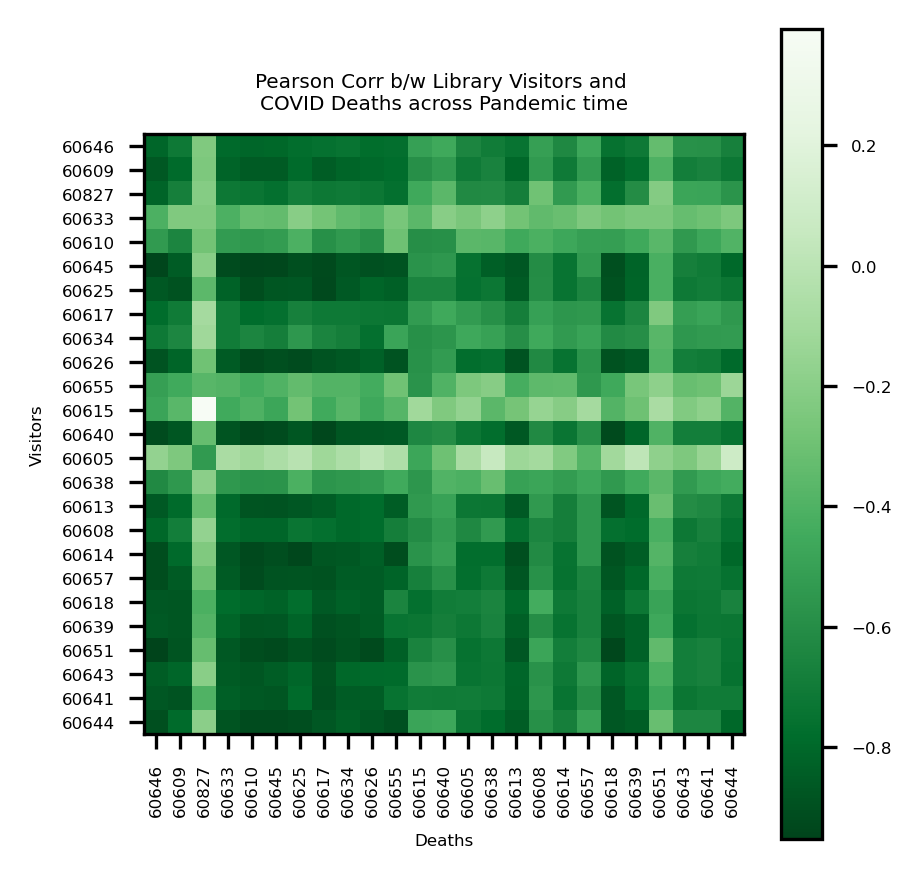

In [66]:
# Merge together
zip_df = pd.concat([deaths_zip, visitors_zip], axis = 1)

# Generate correlation matrix
corr = zip_df.corr(method = 'pearson')

# Find ZIPs with greatest deaths to visits correlation
corr = corr.abs()
corr[ corr == 1] = 0
corr.iloc[0:48, 0:48] = 0
corr.iloc[48:96, 48:96] = 0
max_zips = corr.idxmax().unique()
deaths_visitors_max_zips = max_zips
    
# Regenerate corr matrix with only zips of interest
zip_df.columns = [str(zipcode) + " deaths" for zipcode in shared_zips] + [str(zipcode) + " visitors" for zipcode in shared_zips]
max_zips_annotated = [str(zipcode) + " deaths" for zipcode in max_zips] + [str(zipcode) + " visitors" for zipcode in max_zips]
corr = zip_df[max_zips_annotated].corr(method = 'pearson')
deaths_visitors_corr = corr.iloc[0:len(max_zips),len(max_zips):(len(max_zips)*2)]

# Generate heatmap
fig, ax = plt.subplots()
plt.rcParams.update({'figure.figsize':(4,4), 'figure.dpi':300, 'font.size':4})
im = ax.imshow(deaths_visitors_corr, cmap = 'Greens_r')
cb = fig.colorbar(im)
ax.set_title('Pearson Corr b/w Library Visitors and \nCOVID Deaths across Pandemic time')
ax.set_xlabel('Deaths')
ax.set_ylabel('Visitors')
ax.set_xticks(range(len(max_zips)))
ax.set_xticklabels(max_zips, rotation = 90, size = 4)
ax.set_yticks(range(len(max_zips)))
ax.set_yticklabels(max_zips, size = 4)
fig.tight_layout()

# Export plot
plt.savefig('../Figures/visitors_vs_deaths_spearman_heatmap.png')

plt.show()

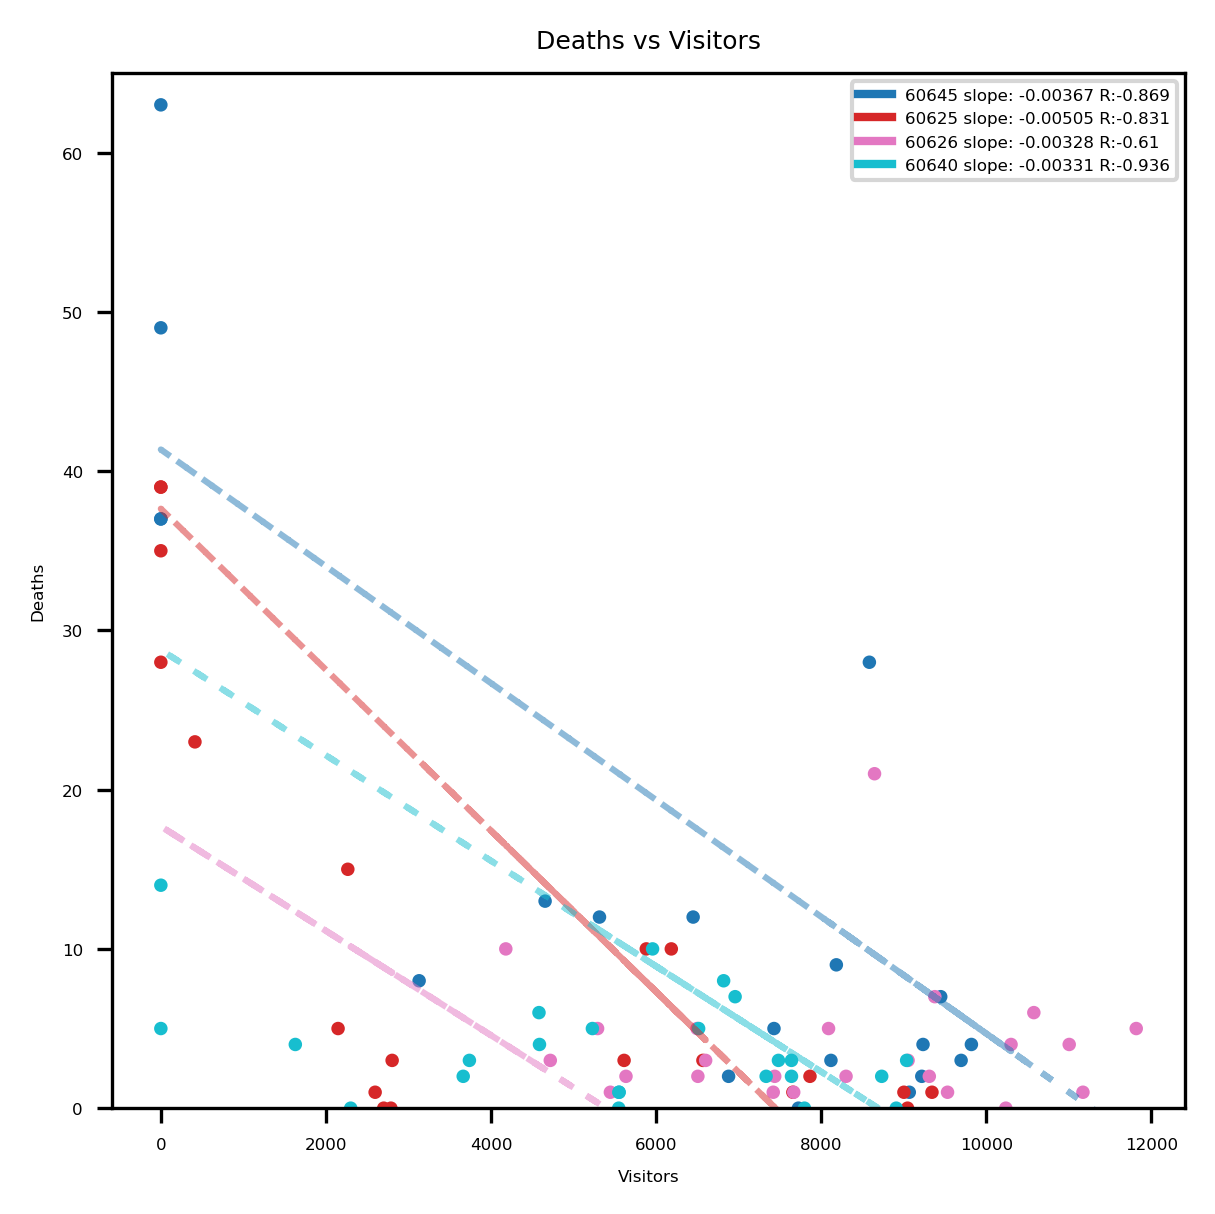

In [67]:
# Plot scatter for zips of interest (60645, 60625, 60626, 60640)
# Subset data
zips_oi = [60645, 60625, 60626, 60640]

monthly_visitors_reset = monthly_visitors.reset_index()
monthly_visitors_sub = monthly_visitors_reset[ (monthly_visitors_reset["ZIP"]).isin(zips_oi) ]
monthly_visitors_sub = monthly_visitors_sub.loc[:,"JANUARY":"DECEMBER"]
deaths_sub = deaths[ (deaths["ZIP"]).isin(zips_oi) ]
monthly_deaths_sub = deaths_sub.loc[:,"JANUARY":"DECEMBER"]

# Define color vector for each ZIP code
colors = cm.tab10(np.linspace(0, 1, len(zips_oi)))
colors_hex = [matplotlib.colors.rgb2hex(color) for color in colors]
colors_rep = np.repeat(colors_hex, 24)

# Generate lines for legend
custom_lines = [Line2D([0], [0], color=colors_hex[0], lw=2),
                Line2D([0], [0], color=colors_hex[1], lw=2),
                Line2D([0], [0], color=colors_hex[2], lw=2),
                Line2D([0], [0], color=colors_hex[3], lw=2)]

# Generate plot
fig, ax = plt.subplots()
plt.rcParams.update({'figure.figsize':(2,2), 'figure.dpi':300, 'font.size':5})
plt.scatter(monthly_visitors_sub, monthly_deaths_sub, s = 5, c = colors_rep)

legend_labels = []
# Add regression
for i in np.arange(4): 
    x_values = np.array(monthly_visitors_sub.iloc[i,2:].tolist() + monthly_visitors_sub.iloc[i+4,:].tolist())
    y_values = monthly_deaths_sub.iloc[i,2:].tolist() + monthly_deaths_sub.iloc[i+4,:].tolist()
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    plt.plot(x_values, slope*x_values + intercept, '--', color = colors_hex[i], alpha = 0.5, dashes=(2, 3))
    r = round(st.pearsonr(y_values, x_values)[0], 3)
    legend_labels.append(str(zips_oi[i]) + " slope: " + str(round(slope, 5)) + " R:" + str(r))
    
ax.set_title('Deaths vs Visitors')
ax.set_xlabel('Visitors')
ax.set_ylabel('Deaths')
ax.set_ylim(0,65)
ax.legend(custom_lines, legend_labels, prop={'size': 4})
fig.tight_layout()

# Export plot
plt.savefig('../Figures/deaths_vs_visitors_scatter_zips_oi.png')

plt.show()

# Visually, can we see a city-wide trend between COVID cases and library visitation?